# 1.03 Distributions Lab

**NOTE**: Double-click on the cells that say "Type _Markdown_ and LaTeX: $\alpha^2$" to open a Markdown cell in which you can enter text without needing to put comments in code cells!

#### 1. Define distribution.

A distribution shows the probability of all the outcomes of a sample space/population. eg. discrete uniform, binomial etc, and PDF, CDF etc.
It is the set of all values of a variable and how frequently we observe each value.

#### 2. When summarizing the distribution of a variable, what are the three aspects of distributions we want to make sure we summarize?

distribution type (normal, poisson etc), mean, standard deviation

#### 3. What is a Bernoulli random variable?

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by n=0 and n=1 in which n=1 ("success") occurs with probability p and n=0 ("failure") occurs with probability q=1-p, where 0<p<1.

#### 4. What is the relationship between the Bernoulli and Binomial distributions?

A binomial distribution is the sum of independent and identically distributed Bernoulli random variables

#### 5. What is the relationship between the Binomial and Poisson distributions?

The poisson distribution (a continuous distribution) is the binomial distribution (a discrete distribution) taken to its extreme. It represents the counts of "positive" events, or successes, within a time span.

#### 6. What is the relationship between the Exponential and Geometric distributions?

The exp distribution (a continuous distribution) is the geom distribution (a discrete distribution) taken to its extreme. It models the amount of time until an event occurs

#### 7. Let's walk through the Central Limit Theorem.

a) Let's create a population of 10,000 observations from a Normal distribution with mean 500 and standard deviation 100. Save this as `population`. Before this step, however, set your seed to 45 using using `random.seed(45)`.

In [91]:
import random
import pandas as pd
import numpy as np
from random import sample
import statistics
import seaborn as sns

random.seed(45)
mean=500
std=100
samples=10000
population=list(np.random.normal(mean,std,samples))
population[0:3]

[602.6178234179015, 346.7655231905061, 439.59357268976976]

b) Generate 1,000 random samples of size 5 from `population`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `norm_samples_5`.

In [174]:
def gen_samples(reps,sample_size,population):
    pop_samples=list(np.zeros(reps,dtype=int))
    norm_samples=list(np.zeros(reps,dtype=int))
    for i in range(reps):
        pop_samples[i]=random.sample(population,5)
        norm_samples[i]=sum(pop_samples[i])/5
    print(pop_samples[0:2])
    print(norm_samples[0:2])
    return pop_samples,norm_samples
norm_samples_5=list(gen_samples(1000,5,population))
type(norm_samples_5)

[[445.16188120685365, 488.7364977485432, 617.5178611130617, 493.9442169184312, 723.8686800041603], [372.4601674754627, 371.5925530464491, 278.07619069428483, 542.7743012617044, 567.8544906207253]]
[553.84582739821, 426.55154061972524]


list

In [267]:
reps=1000
size=5
pop_samples=list(np.zeros(reps,dtype=int))
norm_samples_5=list(np.zeros(reps,dtype=int))
for i in range(reps):
    pop_samples[i]=random.sample(population,size)
    norm_samples_5[i]=sum(pop_samples[i])/size
print(pop_samples[0:2])
print(norm_samples_5[0:2])

[[510.127517143456, 516.321422206657, 423.79007357709446, 571.4350847471151, 407.2328367264011], [596.8119669338055, 426.33314406401445, 568.7389543401019, 572.9740671103878, 392.9257442082505]]
[485.7813868801448, 511.556775331312]



We simulated the sampling distribution of $\bar{X}$ when we took the mean of 1,000 samples from the population. This isn't exactly what the sampling distribution of $\bar{X}$ is, but it's close enough for our purposes! 

(In general, we'd actually take every possible sample of size 5 from our population, but that can get really complicated.)

c) Plot `norm_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

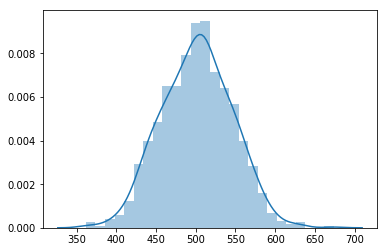

In [268]:
sns.distplot(norm_samples_5)

d) How would you describe the shape of the distribution from c)?

normal distribution, mean of ~500

e) Generate 1,000 random samples of size 50 from `population`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `norm_samples_50`.

In [269]:
reps=1000
size=50
pop_samples_50=list(np.zeros(reps,dtype=int))
norm_samples_50=list(np.zeros(reps,dtype=int))
for i in range(reps):
    pop_samples_50[i]=random.sample(population,size)
    norm_samples_50[i]=sum(pop_samples_50[i])/size
print(pop_samples_50[0])
print(norm_samples_50[0])

[602.243462501612, 495.10844718264394, 514.3261113222435, 421.1709211295664, 392.9307207305662, 412.11415746582924, 446.8816686608833, 453.509297756582, 290.11139822551854, 387.3058797564748, 404.48664415832786, 410.6748839202645, 402.0146180160483, 541.3652637366137, 464.9237974027716, 362.2055636073007, 465.7507434357657, 585.6790110141602, 408.02466107997486, 403.32846422091427, 526.8930594319154, 516.9479910443135, 508.6059961534836, 353.8963136732309, 376.61625614093083, 425.87242808307224, 405.3365484365707, 409.8626562275788, 576.733087039216, 534.2252472257613, 554.2106349303373, 361.48380520070856, 320.85314701558923, 271.78427872529096, 566.9348185471017, 518.6025540419016, 454.8854021147656, 384.7399048731379, 371.04801831806105, 487.75941890068543, 601.8140806078386, 625.7474671452153, 436.8294202716983, 621.6191348172553, 336.52502566236285, 526.5726451581666, 461.0710240072184, 782.5437849090006, 549.5112297950516, 276.32764576336416]
460.20017479169763


f) Plot `norm_samples_50` **with** a kernel density estimate using `seaborn.distplot`.

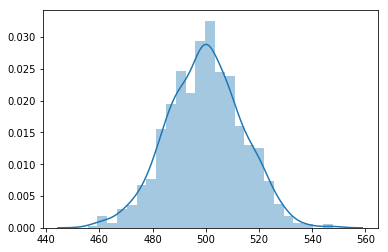

In [180]:
sns.distplot(norm_samples_50)

g) How would you describe the shape of the distribution from f), relative to the distribution you generated for part c)?

also normal distribution, mean also ~500

h) Run this command:

```python
random.seed(46)
population_2 = [np.random.choice([np.random.poisson(2),np.random.poisson(10),np.random.exponential(5)]) for i in range(10000)]

```

In [270]:
random.seed(46)
population_2 = [np.random.choice([np.random.poisson(2),np.random.poisson(10),np.random.exponential(5)]) for i in range(10000)]

i) What is the command in h) doing?

1st line:
to fix the random numbers generated, so that they'll all be the same for future runs of the code. It does so by initializing the pseudo-random number generator

2nd line:
from a list of 3 random numbers (each generated by 1) a poisson distribution with lambda 2, 2) poisson too but with lambda 10, and 3) exponential distribution with scale or lambda 5, respectively), 1 number would be chosen randomly (by default uniform random distribution). Repeat this 10000 times, save them as a list into population_2

j) Is the population created in `population_2` Normally distributed? How do you know?

Not normally distributed. See plot below:

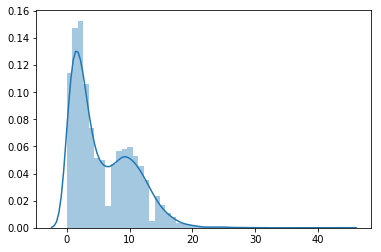

In [271]:
sns.distplot(population_2)

k) Generate 1,000 random samples of size 5 from `population_2`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `poiexp_samples_5`.

In [272]:
reps=1000
size=5
pop_samples_5=list(np.zeros(reps,dtype=int))
poiexp_samples_5=list(np.zeros(reps,dtype=int))
for i in range(reps):
    pop_samples_5[i]=random.sample(population_2,size)
    poiexp_samples_5[i]=sum(pop_samples_5[i])/size
print(pop_samples_5[0])
print(poiexp_samples_5[0])

[10.426848704452356, 0.0, 2.4290936737966575, 6.723756914469126, 1.0]
4.115939858543628


l) Plot `poiexp_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

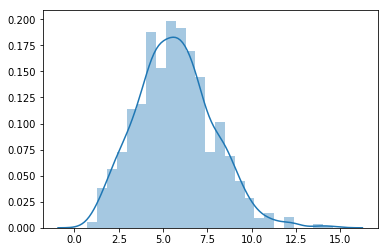

In [273]:
sns.distplot(poiexp_samples_5)

m) How would you describe the shape of the distribution from l)?

Normal distribution with a right/negative skew, with mean ~5

n) Generate 1,000 random samples of size 50 from `population_2`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `poiexp_samples_50`.

In [274]:
reps=1000
size=50
pop_samples_50=list(np.zeros(reps,dtype=int))
poiexp_samples_50=list(np.zeros(reps,dtype=int))
for i in range(reps):
    pop_samples_50[i]=random.sample(population_2,size)
    poiexp_samples_50[i]=sum(pop_samples_50[i])/size
print(pop_samples_50[0])
print(poiexp_samples_50[0])

[11.0, 12.0, 1.0, 0.22478441275963373, 6.586284459725158, 1.0, 4.0, 2.0, 4.262608840476466, 0.0, 1.0, 1.1549035145178344, 13.0, 4.0, 2.956743710833281, 2.009593385888629, 2.0, 10.46474386467482, 2.4285596799669493, 2.0, 7.495019766257206, 1.0, 3.0, 16.18097698779663, 9.0, 9.0, 15.0, 10.0, 1.4197014705524942, 10.0, 9.0, 9.016858098139405, 3.0, 1.769738228675882, 0.0, 3.0, 8.0, 0.547005559797173, 0.0, 1.293571485891509, 1.0403763204391707, 18.14006655668274, 2.9923425494331095, 2.0, 1.855007069186171, 15.0, 0.2851841703428089, 5.0, 13.0, 2.376002998561283]
5.2500014626119675


o) Plot `poiexp_samples_50` with a kernel density estimate using seaborn.distplot.

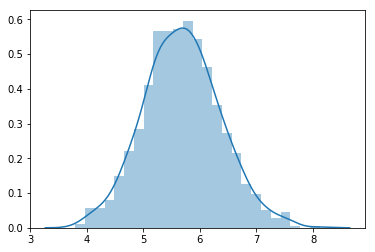

In [275]:
sns.distplot(poiexp_samples_50)

p) How would you describe the shape of the distribution from o)?

also normal distribution, with mean ~5.5

**You just observed the Central Limit Theorem. Let's make this a bit more explicit.**

q) When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`norm_samples_5`), what was the shape of the sampling distribution of $\bar{X}$?

normally distributed curve

r) When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`norm_samples_50`), what was the shape of the sampling distribution of $\bar{X}$?

normally distributed curve

s) So, if our original population is a Normal distribution, what will the sampling distribution be shaped like - regardless of sample size?

normally distributed curve

t) When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`poiexp_samples_5`), what was the shape of the sampling distribution of $\bar{X}$?

normally distributed curve with a right/negative skew

u) When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`poiexp_samples_50`), what was the shape of the sampling distribution of $\bar{X}$?

normally distributed curve

v) So, if our original population is not a Normal distribution, what will the sampling distribution be shaped like when $n$ is small (like 5)?

it wont be normally distributed

w) So, if our original population is not a Normal distribution, what will the sampling distribution be shaped like when $n$ is large (like 50)?

it would tend towards a normal distribution

x) When you sample from a non-Normal distribution, what happens to our sampling distribution of $\bar{X}$ as we increase $n$?

it eventually becomes a normal distribution

BONUS: If you're so inclined, repeat steps k and l for sample size $n=10, 20, 30, 50, 100$ to look at this phenomenon more closely! You could write a loop to do this.

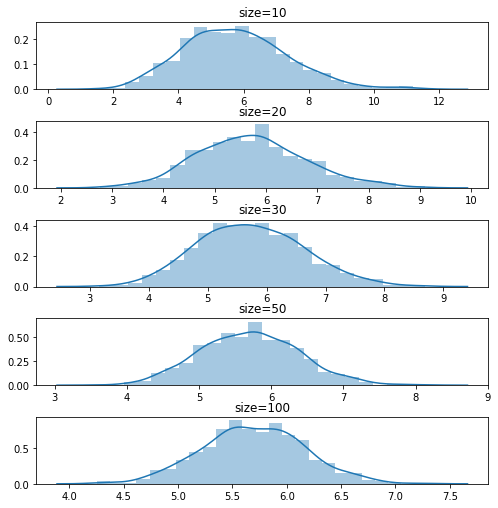

In [276]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(5, 1, figsize=(7,7))
f.tight_layout()

reps=1000
size=[10,20,30,50,100]
pop_samples_bonus=list(np.zeros(reps,dtype=int))
poiexp_samples_bonus=list(np.zeros(reps,dtype=int))
for j in range(len(size)):
    for i in range(reps):
        pop_samples_bonus[i]=random.sample(population_2,size[j])
        poiexp_samples_bonus[i]=sum(pop_samples_bonus[i])/size[j]
    sns.distplot(poiexp_samples_bonus, ax=axes[j])
    axes[j].title.set_text('size=%i'%size[j])